# Lekce 6

Hypotézou obecně myslíme nějaké tvrzení. Testování hypotéz se zabývá ověřením, zda je nějaká hypotéza platná. Při testování hypotéz předpokládáme, že máme k dispozici nějaký vzorek dat, nikoli kompletní data. To vnáší prvek určité nejistoty.

Vraťme se k našemu příkladu na závislost ceny domu a podlahové plochy. Naše data jsou pouze vzorkem údajů o celém realitním trhu v USA. V datech jsme zjistili korelaci mezi cenou a plochou domu. Můžeme ale na základě korelačního koeficientu skutečně říct, že jsou tyto veličiny skutečně závislé?

Pokud posuzujeme závislost dvou sloupců tabulky, vstupují do hry dva faktory:

- velikost korelačního koeficientu,
- množství dat.

U korelačního koeficientu platí, že čím je blíže 1 nebo - 1, tím je závislost vyšší. Dále platí, že čím více máme dat, tím více si můžeme být jisti naším výsledkem. Tj. pokud máme silnou korelaci u malého vzorku, může jít o náhodu, silná korelace u velkého vzorku dat už ale náhoda spíše nebude. Testování hypotéz je nástroj, který nám řekne, zda je pozorovaná korelace náhodná, či zda jsou data skutečně závislá.

Testování hypotéz má pevný postup, který se skládá z následujících kroků:

* Formulace statistických hypotéz.
* Výběr vhodného testu.
* Výpočet hodnoty testového kritéria.
* Rozhodnutí o platnosti nulové hypotézy.

## Formulace statistických hypotéz

Při testování hypotéz vždy nejprve definujeme dvě hypotézy - **nulovou** a **alternativní**. Tyto dvě hypotézy musí být vždy ve sporu, tj. nemůže nastat situace, že by byly obě pravdivé. Nulová hypotéza v sobě má často znaménko *rovná se*, alternativní pak mívá znaménko *nerovná se*, *větší než* nebo *menší než*. Dále můžeme v nulové hypotéze tvrdit, že mezi dvěma sloupci v tabulce není závislost, a alternativní hypotéza bude říkat, že závislost existuje.

Navažme na předchozí lekci, kde jsme měřili sílu statistické závislosti mezi cenou domu a obytnou plochou. Hodnotu korelačního koeficientu sice známe, ale ta nám toho sama o sobě tolik neřekne. Nyní budeme chtít ověřit, že je vliv velikosti obytné plochy na cenu domu **statisticky významný**, tj. rozhodneme, zda tento vliv není čistě náhodný. 

Uvažujme následující dvojici hypotéz:

- Nulová hypotéza: Obytná plocha domu a jeho cena jsou lineárně nezávislé (tj. korelační koeficient = 0).
- Alternativní hypotéza: Obytná plocha domu a jeho cena jsou lineárně závislé (tj. korelační koeficient nerovná se 0).

Je zřejmé, že obě hypotézy nemohou být pravidivé. Při testování hypotéz můžeme dojít k následujícím závěrům:

* zamítáme H0 (a tedy tvrdíme, že platí H1),
* nezamítáme H0 (a tedy jsme neprokázali, že platí H1).

Nikdy neříkáme, že jsme prokázali H0. Níže si vysvětlíme proč.

Poněkud nepříjemnou zprávou pro vás může být informace, že výsledek našeho testu může být chybný, a to i v případě, že jsme postuovali správně. Může se totiž stát, že prostě máme smůlu na náš vzorek, který nereprezentuje data o celé populaci úplně správně.

Při testování se můžeme dopustit 2 chyb, které jsou popsány v tabulce níže.

|   | Plocha a cena jsou nezávislé | Plocha a cena jsou závislé |
|---|---|---|
| **Neprokázali jsme závislost** | Správný výsledek | Chyba II. druhu |
| **Tvrdíme, že cena a plocha jsou závislé**  | Chyba I. druhu | Správný výsledek |

Rozepišme si nyní tyto chyby obecně

|   | Nulová hypotéze platí | Nulová hypotéza neplatí |
|---|---|---|
| **Nezamítáme nulovou hypotézu** | Správný výsledek | Chyba II. druhu |
| **Zamítáme nulovou hypotézu**  | Chyba I. druhu | Správný výsledek |

Při testování hypotéz si zpravidla vybíráme pravděpodobnost, s jakou se chceme dopustit chyby I. druhu. Pravděpodobnost chyby I. druhu označujeme jako **hladinu významnosti**.

## Výběr vhodného testu

Dále zvolíme vhodný test pro ověření naší hypotézy. Statistických testů existuje obrovské množství a výběr toho správného závisí obecně na několika faktech:

- Počet souborů (skupin) dat, se kterými chceme v testu pracovat. V tomto konkrétním případě chceme pracovat se dvěma soubory, můžeme mít ale pouze jeden či naopak 3 a více.
- Statistický ukazatel nebo skutečnost, kterou chceme ověřit. Může to být například průměr, rozptyl nebo (jak je tomu v našem případě) statistická závislost.
- Předpoklady testu. Předpoklad je nějaká podmínka, která musí být splněna, aby test dával kvalitní výsledky. Mnoho testů má předpoklad statistického rozdělení dat. Často testy rozdělujeme na parametrické a neparametrické, kde neparametrické testy jsou testy s mírnějšími předpoklady.

Vraťme se k výběru korelačního koeficientu. Pro test použijeme test pomocí tzv. Kendallovo tau. Tento test je jedním z tzv. neparametrických testů, tj. nevyžaduje, aby data měla normální rozdělení. Funguje na porovnání pořadí hodnot. Pokud jsou data závislá, pak by logicky nejdražší domy měly být mezi největšími a nejlevnější domy mezi nejmenšími. Pokud by naopak data byla nezávislá, největší domy budou jak mezi drahými, tak mezi levnými, a to samé platí i pro nejmenší domy.

Data jsou ke stažení [zde](house_prices.csv).

In [2]:
import pandas
from scipy import stats

data = pandas.read_csv("house_prices.csv")
res = stats.kendalltau(data["SalePrice"], data["GrLivArea"])
print(res)

SignificanceResult(statistic=0.543863812013887, pvalue=1.995410251143093e-211)


Co tato záhadná čísla znamenají?

- `statistics` je hodnota statistiky testu. Statistika testu je v podstatě matematický vzoreček. V tomto případě číslo říká, jak moc pořadí pozorování v jednom souboru odpovídá pořadí pozorování ve druhém souboru.
- `pvalue` (p-hodnota) se váže k hladině významnosti. p-hodnotu využijeme pro rozhodnutí o platnosti alternativní hypotézy.

Platí následující **obecná** pravidla.

- Pokud je **p-hodnota menší než hladina významnosti, zamítáme nulovou hypotézu** (tj. platí alternativní hypotéza).
- Pokud je **p-hodnota větší než hladina významnosti, nezamítáme nulovou hypotézu.**

Pokud si zvolíme hladinu významnosti jako 5 %, což je nejčastější volba, můžeme zapsat pravidlo konkrétněji.

- Pokud je **p-hodnota < 0.05, zamítáme nulovou hypotézu** (tj. platí alternativní hypotéza).
- Pokud je **p-hodnota > 0.05, nezamítáme nulovou hypotézu.**

V našem případě je p-hodnota `1.995410251143093e-211`. Pozor, velmi důležitý je závěr `e-211`. Číslo je ve skutečnosti extrémně malé, prvních 210 čísel desetinné části jsou 0 a až poté přichází nějaká nenulová čísla. Hodnota je tedy rozhodně menší než 0.05, tím pádem nulovou hypotézu zamítáme a tvrdíme, že obytná plocha domu a cena domu jsou lineárně závislé. Ocenění domu by tedy mělo uvažovat podlahovou plochu domu.

## Test normality dat

Mnoho statistických testů vyžaduje normalitu dat, tj. to, že data mají normální rozdělení. Testujeme-li normalitu dat, formulujeme hypotézy následujícím způsobem:

- Nulová hypotéza: Ceny domů v našem souboru mají normální rozdělení.
- Alternativní hypotéza: Ceny domů v našem souboru nemají normální rozdělení.

Pro ověření normality dat existuje řada testů. Oblíbený je například Shapiro-Wilk test, který je součástí modulu `scipy`. Pro provedení testu použijeme funkci `shapiro` z modulu `scipy`. Funkci předáváme data ve sloupci `SalePrice`.

In [1]:
import pandas
from scipy import stats

data = pandas.read_csv("house_prices.csv")
res = stats.shapiro(data["SalePrice"])
print(res)

ShapiroResult(statistic=0.8918799757957458, pvalue=8.921436004661806e-31)


Data tedy nemají normální rozdělení, což znamená, že na ně nemůžeme použít parametrické testy.

# Cvičení

## Plocha garáže

Na minulé lekci jsme řešili korelaci mezi plochou garáže (`GarageArea`) a cenou domu. Ověř nyní, zda je tato korelace statisticky významná.

Použij Kendallovo tau pro ověření statistické významnosti lineární závislosti. Jaká je p-hodnota testu? Zamítáme nulovou hypotézu?

## Plocha garáže 2

Ač cena domu nemá normální rozdělení, možná by ho mohla mít plocha garáže. Ověř hypotézu normality pro plochu garáže. Formuluj hypotézy, následně použij Shapiro-Wilk test. Jaká je p-hodnota testu? A co to znamená?

## Bonus: Vztahy a známky

Uvažuj data v souboru (student-mat.csv)[student-mat.csv]. Jedná se o data, která obsahují výsledky studentů matematiky na portugalských školách. Chceme ověřit, zda je statistické rozdělení výsledků studentů a studentek ovlivněno tím, jestli mají romatický vztah.

Výsledky z testu jsou uloženy ve sloupci `G3` a informace o tom, jestli má student/ka milostný vztah, je ve sloupci `romantic`. Rozděl data do dvou tabulek - v jedné tabulce budou studenti a studentky mající vztah a ve druhém ti, kteří vztah nemají. Ověř, kolik je v každé tabulce záznamů. Pro lepší představu si můžeš vytvořit z obou tabulek graf histogramu nebo odhad distribuční funkce, obojí jsme dělali na 5. lekci. Naším úkolem je zjistit, jestli je rozdíl obou grafů natolik velký, abychom mohli říct, že to není náhoda.

Dále se drž postupu, který jsme si ukazovali. Jde nám po porovnání statistických rozdělení. Jaká bude nulová a jaká bude alternativní hypotéza? A jaký test využijeme? Podívej se na seznam testů níže nebo na rozhodovací strom a vyber vhodný test. Je třeba uvážit kolik máme souborů dat a zda jsou data párová nebo ne.

Po výběru vhodného testu zkus tento test provést. Jaká je p-hodnota? A co to znamená?

### Nápověda

Po rozdělení dat by měly vzniknout následující tabulky.

In [3]:
data_yes = pandas.read_csv("data_yes.csv")
data_yes.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
1,14,GP,M,15,U,GT3,A,2,2,other,...,4,5,2,1,1,3,0,14,16,16
2,29,GP,M,16,U,GT3,T,4,4,teacher,...,4,4,5,5,5,5,16,10,12,11
3,32,GP,M,15,R,GT3,T,4,3,teacher,...,4,5,2,1,1,5,0,17,16,16
4,37,GP,M,16,R,GT3,A,4,4,other,...,2,4,3,1,1,5,7,15,16,15


In [4]:
data_no = pandas.read_csv("data_no.csv")
data_no.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
4,5,GP,M,16,U,LE3,T,4,3,services,...,5,4,2,1,2,5,10,15,15,15


In [5]:
print(f"Počet lidí se vztahem: {data_yes.shape[0]}, počet lidí bez vztahu: {data_no.shape[0]}")

Počet lidí se vztahem: 132, počet lidí bez vztahu: 263


Níže jsou grafy, které můžeš vygenerovat.

<Axes: >

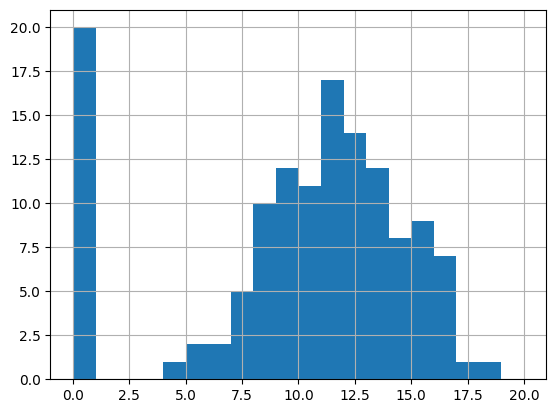

In [10]:
bins = range(0, 21)

data_yes["G3"].hist(bins=bins)

<Axes: >

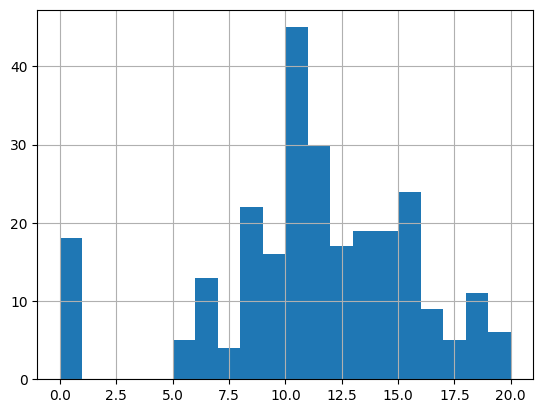

In [11]:
data_no["G3"].hist(bins=bins)

<Axes: ylabel='Density'>

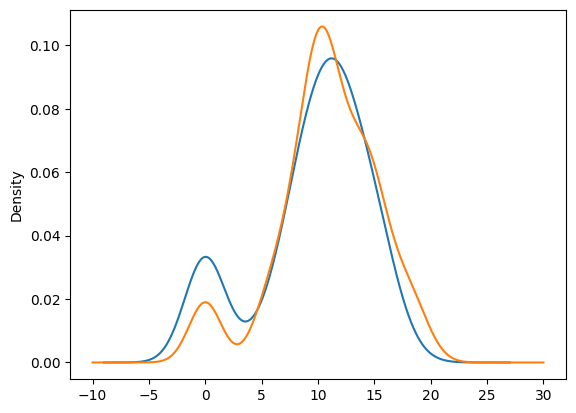

In [9]:
data_yes["G3"].plot.kde()
data_no["G3"].plot.kde()

Vhodný test, definice hypotéz, výsledek výpočtu a interpretace jsou [zde](napoveda.ipynb).

## Přehled statistických testů v Pythonu

Tato část vám pomůže s výběrem vhodného testu pro vaše projekty.

Při výběru testu je možné použít i rozhodovací stromy, zde je příklad [jednoho z nich](strom_1.png). Zde [druhý](strom_2.png), poněkud složitější.

### Testy s jedním statistickým souborem

Tyto testy porovnávají jeden statistický soubor (jeden sloupec tabulky) oproti nějaké skutečnosti.

#### Testy na průměr

Testy na průměr porovnávají průměr souboru dat s nějakou námi definovanou hodnotou. U testů na průměr můžeme alternativní hypotézu formulovat pomocí znaménka není rovno, menší než nebo větší než.

Níže jsou příklady dvojic hypotéz.

* H0: Průměrná výška basketbalistek v České republice je 180 cm
* H1: Průměrná výška basketbalistek v České republice je více než 180 cm

* H0: Průměrná chyba při výrobě součástky do motoru je 0.1 mm
* H1: Průměrná chyba při výrobě součástky do motoru je méně než 0.1 mm

* H0: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 je 5 minut
* H1: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 není 5 minut (tj. je méně nebo více než 5 minut)

Pro test hypotézy můžeme využít následující testy:

* [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), který předpokládá, že data mají normální rozdělení.

#### Testy na rozdělení

Příklad hypotéz:

* H0: Ceny domů mají normální rozdělení
* H1: Ceny domů nemají normální rozdělení

Pro test hypotézy můžeme využít následující testy:

* [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)
* Kombinace D'Agostinova and Pearsonova testu, který provádí funkce [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest).

Pokud v hypotéze potřebujeme ověřit, zda data mají nějaké jiné rozdělení, můžeme použít [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest).

### Testy se dvěma statistickými soubory

Tyto testy porovnávají dva různé statistické soubory.

#### Testy na průměr

U testu na průměr máme k dispozici poměrně hodně testů.

Uvažujme nejprve párová pozorování. Párovými pozorování myslíme, že pro každému pozorování z jednoho souboru můžeme přiřadit jiné pozorování podle nějakého logického klíče. Například uvažujme školení pracovníků pracující u výrobní linky. Pokud máme data o rychlosti montáže pracovníků před školením a po školení, můžeme použít párování, protože rychlost před školením a po školení pro jednoho pracovníka tvoří párové pozorování. Pokud bychom chtěli porovnat rychlost pracovníků v jiných směnách nebo jiných závodech, nejedná se o párová pozorování.

Příklad hypotéz:

* H0: Rychlost montáže pracovníků po školení je stejná jako před školením
* H1: Rychlost montáže pracovníků po školení je vyšší než před školením

Pro test hypotézy můžeme použít [párový t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). Test předpokládá, že data mají normální rozdělení.

Pro nepárové testy můžeme mít následující hypotézy:

* H0: Rychlost montáže pracovníků v obou sledovaných směnách je stejná
* H1: Rychlost montáže pracovníků v obou sledovaných směnách je různá

Pro test hypotézy můžeme použít [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind). Test předpokládám, že data mají normálhní rozdělení. U testu existují dvě varianty - jedna předpokládá, že data mají stejný rozptyl, druhá uvažuje, že soubory mají různé rozptyly.

#### Testy na rozdělení

Testy na rozdělení umožňují porovnat, zda mají dva statistické soubory stejné rozdělení, tj. zda mají stejnou distrubuční funkci. Opět rozlišujeme párový a nepárový test.

Pro párový test můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže pracovníků po školení je stejná jako před školením
* H1: Rozdělení rychlosti montáže pracovníků po školení je jiná než před školením

Pro test můžeme použít [Wilcoxonův test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon). Test je neparametrický, tj. nevyžaduje normální rozdělení.

Pro nepárová pozorování můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže v obou sledovaných směnách jsou stejná
* H1: Rozdělení rychlosti montáže v obou sledovaných směnách jsou různá

Pro otestování můžeme použít [Mann–Whitney test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu). Test je neparametrický, tj. nevyžaduje normální rozdělení.

#### Testy závislosti kategoriálních dat

Kategoriální data jsou taková, která obecně není číslo, ale text (v řeči programování řetězec). Kategoriální proměnnou tedy může být oblíbený programovací jazyk, předmět na škole, nápoj, nejvyšší dosažené vzdělání, zda je člověk kuřák atd. Kategoriální proměnné můžeme porovnat mezi sebou a rozhodnout, zda je mezi nimi závislost.

Hypotézy mohou být například následující:

* H0: Oblíbený předmět nezávisí na pohlaví
* H1: Oblíbený předmět závisí na pohlaví

Pro test hypotézy můžeme použít [chí-kvadrát test nezávislosti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). Test je založený na použití kontingenční (pivot) tabulky.

#### Test statistické významnosti korelace

Test řeší, zda je zjištěná korelace statisticky významná. 

Uvažujme následující hypotézy:

H0: Cena domu a obytná plocha domu nejsou statisticky závislé
H1: Cena domu a obytná plocha domu jsou statisticky závislé


Pokud mají data normální rozdělení, lze využít test založený na [Pearsonově korelačním koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr). Pokud data nemají normální rozdělení, můžeme využít test s využitím [Spearmanova koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) nebo [Kendallova tau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau).

### Testy se třemi a více statistickými soubory

#### Test na průměr

Test na průměr umožňuje porovnat, zda jsou průměry hodnot různé u tří a více souborů.

Pro test můžeme formulovat hypotézy:

* H0: Průměrný čas montáže je stejný u pracovníků všech tří směn
* H1: Průměrný čas montáže různý alespoň dvě směny

Uvažujme, že máme ranní, odpolední a noční směnu. Test nám pouze řekne, zda je mezi směnami nějaký rozdíl, ale nevíme přesně jaký. Může tedy být například stejný průměr ranní a odpolední směny a noční se od nich liší, může být stejný průměr ranní a noční směny a odpolední se od nich liší nebo může mít každá směna průměr odlišný od ostatních.

Pokud mají všechny soubory normální rozdělení, můžeme použít [ANOVA test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway). Pokud data nemají normální rozdělení, je možné využít neparametrický [Kruskall-Wallis test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal).
